In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib, random
import networkx as nx
import community

In [2]:
# Load data
df_graph = pd.read_csv('./data/graph.csv')
df_people = pd.read_csv('./data/people.csv')
df_graph = df_graph[df_graph.p1 != df_graph.p2].reset_index(drop = True)

In [3]:
# Rank by citations (total cited number by others)
corr = np.zeros((640, 640))
for j in range(len(df_graph)):
    corr[df_graph.p1[j], df_graph.p2[j]] = df_graph['count'][j]
    
citations = np.sum(corr, axis=0)
citations = sorted([(j, citations[j]) for j in range(len(citations))], key = lambda x: x[1], reverse = True)
# citations = [(df_people.iloc[citations[j][0]].name_en + '(' + df_people.iloc[citations[j][0]].name_zh + ')', 
#               citations[j][1]) for j in range(len(citations))]
# citations = [(df_people.iloc[citations[j][0]].name_en, 
#               citations[j][1]) for j in range(len(citations))]
citations = pd.DataFrame(columns=['name', 'score'], data=citations)
citations_picked = citations[citations.score > 20]

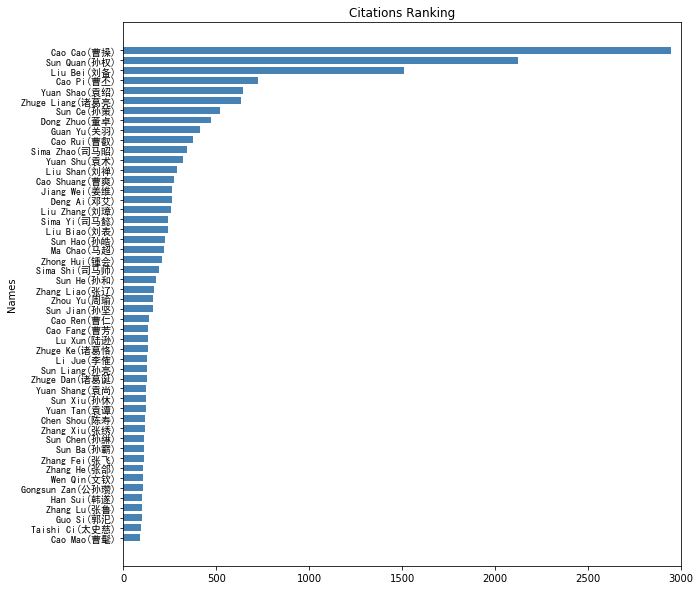

In [4]:
def draw_citations_ranking(citations, language = 'English'):
    plt.figure(figsize = (10, 10))
    plt.barh(range(len(citations[0:50])), list(citations[0:50].score[::-1]), height=0.7, color='steelblue')
    top_people = df_people.iloc[citations[0:50].name[::-1]]
    if language == 'Chinese': plt.yticks(range(len(citations[0:50])), list(top_people.name_zh), fontproperties = 'simhei')
    elif language == 'Both': plt.yticks(range(len(citations[0:50])), 
                                        [person[1].name_en + '(' + person[1].name_zh + ')' for person in top_people.iterrows()], 
                                        fontproperties = 'simhei')
    else: plt.yticks(range(len(citations[0:50])), list(top_people.name_en))
    plt.xlim(0,3000)
    plt.ylabel("Names")
    plt.title("Citations Ranking")
    plt.show()
    
draw_citations_ranking(citations_picked, 'Both')

In [5]:
# Pick important people
df_graph_picked = df_graph[df_graph.p1.isin(citations_picked.name)]
df_graph_picked = df_graph_picked[df_graph_picked.p2.isin(citations_picked.name)].reset_index(drop=True)

# Save before change to undirected graph
df_graph_picked.to_csv('./data/graph_picked.csv', index = False)

In [6]:
# Save data
citations_picked.to_csv('./data/citations_picked.csv', index = False)